In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
warnings.filterwarnings('ignore')
%matplotlib inline

# 경향성이 있는 그래프의 선형적으로 증가할 수 있게 하는 함수 
def trend(time, slope = 0):
    return time * slope

# x: 시간축인 함수 plot 함수
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

# 120개씩 자르는 함수 
def univariate_data(dataset, start_index, end_index):
    data = []
    history_size = 120
    start_index = start_index + history_size


    for i in range(start_index, end_index, 120): # 0
        indices = range(i - history_size, i) # [0 - 120] , [120 - 240] ...
        # Reshape data from (history_size,) to (history_size, 1)

        data.append(dataset[indices])

    return np.array(data)

for i in range(1,9):
    globals()['df_'+str(i) ]= pd.read_csv('./temperature_csv_file/temp_df_{}.csv'.format(i), encoding = 'cp949')

df_all = pd.concat([df_1, df_2], axis = 0)
df_all = pd.concat([df_all, df_3], axis = 0)
df_all = pd.concat([df_all, df_4], axis = 0)
df_all = pd.concat([df_all, df_5], axis = 0)
df_all = pd.concat([df_all, df_6], axis = 0)
df_all = pd.concat([df_all, df_7], axis = 0)
df_all = pd.concat([df_all, df_8], axis = 0)

df_all = df_all[:601800].reset_index().drop(columns = ['index'], axis = 0)

for i in range(1,8):
    globals()['df_'+str(i)+'_tmp'] = df_all[85920*(i-1):85920*i].reset_index().drop(columns=['index'], axis=0)

N = 6
dx = (600 - df_1_tmp['TEMP'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
dx_minute = dx / (len(df_1_tmp)-1) # 분당 증가율

time = np.arange(85920)
slope = dx_minute * 2

def trend(time, slope = 0):
    return time * slope

for i in range(1,8):
    mean = globals()['df_'+str(i)+'_tmp']['TEMP'].mean()
    diff  = 261.7292228119181 - mean
    globals()['df_'+str(i)+'_tmp']['TEMP'] += diff

for i in range(8,12):
    globals()['df_'+str(i)+'_tmp'] = globals()['df_'+str(i-5)+'_tmp'].copy()

for i in range(2,12):
    series = np.round(trend(time, slope = slope) + globals()['df_'+str(i)+'_tmp']['TEMP'] + dx*(i-2), 3)
    globals()['df_'+str(i)+'_tmp']['TEMP'] = series

for i in range(1,12):
    data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'Group' : []}

    for j in range(0,85890,30):
        temp = globals()['df_'+str(i)+'_tmp']['TEMP'][j:j+60]
        MEAN = np.round(np.mean(temp), 3)
        MIN = np.min(temp)
        MAX = np.max(temp)
        STD = np.std(temp)
        median = temp.median()
        skew = temp.skew()
        kurt = temp.kurt()
        a, b = np.percentile(temp, q = [25,75])

        data['Group'].append(i)
        data['MEAN_TEMP'].append(MEAN)
        data['MIN'].append(MIN)
        data['MAX'].append(MAX)
        data['STD'].append(STD)
        data['SKEW'].append(skew)
        data['KURT'].append(kurt)
        data['MEDIAN'].append(np.round(median,3))
        data['25%'].append(np.round(a,3))
        data['75%'].append(np.round(b,3))

    globals()['group_'+str(i)] = pd.DataFrame(data)


print(len(group_1))
TIME = pd.DataFrame({'TIME' : np.arange(31493)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = ['index'], inplace = True)
df = tmp
df

tmp = np.arange(945120)
TIME = pd.DataFrame({'TIME' : tmp})
df_temp_all = pd.concat([df_1_tmp, df_2_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_3_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_4_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_5_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_6_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_7_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_8_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_9_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_10_tmp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_11_tmp], axis = 0)
df_temp_all = df_temp_all.reset_index().drop(columns = ['date', 'index','kst'])
df_temp_all = pd.concat([df_temp_all,TIME], axis = 1)
df_temp_all

2863


,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
945115,932.228,945115
945116,931.950,945116
945117,931.836,945117
945118,932.184,945118


In [91]:
temperature_1 = pd.read_csv('./temperature_csv_file/temp_df_1.csv')
temperature_1

,date,kst,TEMP
0,20230101,9:00,286.797
1,20230101,9:00,287.082
2,20230101,9:01,285.938
3,20230101,9:01,285.772
4,20230101,9:02,286.357
...,...,...,...
88189,20230131,23:57,274.692
88190,20230131,23:58,274.674
88191,20230131,23:58,274.588
88192,20230131,23:59,274.511


In [92]:
gps_1 = pd.read_csv('./gps/h2451_v1_geo_20230101_20230114.csv')
gps_1 = gps_1[1080:]

gps_1 = gps_1.iloc[:, 2:4]
gps_1

,longitude,latitude
1080,163.427467,28.531400
1081,163.424783,28.531967
1082,163.421917,28.532567
1083,163.419217,28.532933
1084,163.416517,28.533467
...,...,...
40313,148.841500,32.539383
40314,148.844467,32.539850
40315,148.846450,32.540283
40316,148.849433,32.540717


In [93]:
gps_2 = pd.read_csv('./gps/h2451_v1_geo_20230115_20230131.csv')
gps_2 = gps_2.iloc[:, 2:4]
gps_2

,longitude,latitude
0,148.855517,32.541667
1,148.858467,32.542117
2,148.861417,32.542617
3,148.864300,32.543117
4,148.867400,32.543450
...,...,...
48951,-81.480883,6.903217
48952,-81.478700,6.903250
48953,-81.476450,6.903300
48954,-81.474217,6.903317


In [94]:
39238 + 48956

88194

In [95]:
gps = pd.concat([gps_1, gps_2], axis = 0).reset_index().drop(columns = 'index')
gps


,longitude,latitude
0,163.427467,28.531400
1,163.424783,28.531967
2,163.421917,28.532567
3,163.419217,28.532933
4,163.416517,28.533467
...,...,...
88189,-81.480883,6.903217
88190,-81.478700,6.903250
88191,-81.476450,6.903300
88192,-81.474217,6.903317


In [96]:
df_1 = pd.concat([temperature_1, gps], axis = 1)
df_1

,date,kst,TEMP,longitude,latitude
0,20230101,9:00,286.797,163.427467,28.531400
1,20230101,9:00,287.082,163.424783,28.531967
2,20230101,9:01,285.938,163.421917,28.532567
3,20230101,9:01,285.772,163.419217,28.532933
4,20230101,9:02,286.357,163.416517,28.533467
...,...,...,...,...,...
88189,20230131,23:57,274.692,-81.480883,6.903217
88190,20230131,23:58,274.674,-81.478700,6.903250
88191,20230131,23:58,274.588,-81.476450,6.903300
88192,20230131,23:59,274.511,-81.474217,6.903317


In [97]:
df_1.to_csv('./temp_add_gps/temp_and_gps_1.csv')


In [98]:
temp_path = './temperature_csv_file/'
gps_path = './gps/'
gps_list = os.listdir(gps_path)
temp_list = os.listdir(temp_path)
print("1 index of file")
print("Temperature Length : ", len(temperature_1), ", 1 Gps File Length : ", len(gps_1), ", 2 Gps File Length : " , len(gps_2))
print("Sum of GPS FIle length is same with Temperature File : ", len(temperature_1) == (len(gps)))

for idx in range(1,7):
    temp_file = pd.read_csv(os.path.join(temp_path + temp_list[idx]))
    gps_file_1, gps_file_2 = pd.read_csv(os.path.join(gps_path + gps_list[idx*2])), pd.read_csv(os.path.join(gps_path + gps_list[idx*2 + 1]))
    print(f"{idx+1} index of file")
    print("Temperature Length : ", len(temp_file), ", 1 Gps File Length : ", len(gps_file_1), ", 2 Gps File Length : " , len(gps_file_2))
    print("Sum of GPS FIle length is same as Temperature File : ", len(temp_file) == (len(gps_file_1) + len(gps_file_2)))

1 index of file
Temperature Length :  88194 , 1 Gps File Length :  39238 , 2 Gps File Length :  48956
Sum of GPS FIle length is same with Temperature File :  True
2 index of file
Temperature Length :  80640 , 1 Gps File Length :  40320 , 2 Gps File Length :  40320
Sum of GPS FIle length is same as Temperature File :  True
3 index of file
Temperature Length :  89276 , 1 Gps File Length :  40316 , 2 Gps File Length :  48960
Sum of GPS FIle length is same as Temperature File :  True
4 index of file
Temperature Length :  86396 , 1 Gps File Length :  40316 , 2 Gps File Length :  46080
Sum of GPS FIle length is same as Temperature File :  True
5 index of file
Temperature Length :  89182 , 1 Gps File Length :  40242 , 2 Gps File Length :  48940
Sum of GPS FIle length is same as Temperature File :  True
6 index of file
Temperature Length :  86390 , 1 Gps File Length :  40314 , 2 Gps File Length :  46076
Sum of GPS FIle length is same as Temperature File :  True
7 index of file
Temperature Leng

In [99]:
temp_path = './temperature_csv_file/'
gps_path = './gps/'
gps_list = os.listdir(gps_path)
temp_list = os.listdir(temp_path)
for idx in range(1,7):
    temp_file = pd.read_csv(os.path.join(temp_path + temp_list[idx]))
    gps_file_1, gps_file_2 = pd.read_csv(os.path.join(gps_path + gps_list[idx*2])), pd.read_csv(os.path.join(gps_path + gps_list[idx*2 + 1]))

    print(temp_list[idx], gps_list[idx*2], gps_list[idx*2 + 1])
    print("Temperature Length : ", len(temp_file), ", 1 Gps File Length : ", len(gps_file_1), ", 2 Gps File Length : " , len(gps_file_2))

    gas = pd.concat([gps_file_1.loc[:, ['longitude','latitude']], gps_file_2.loc[:, ['longitude','latitude']]], axis = 0).reset_index().drop(columns = 'index')
    df = pd.concat([temp_file, gas], axis = 1)
    df.to_csv('./temp_add_gps/temp_and_gps_{}.csv'.format(idx+1))

temp_df_2.csv h2451_v1_geo_20230201_20230214.csv h2451_v1_geo_20230215_20230228.csv
Temperature Length :  80640 , 1 Gps File Length :  40320 , 2 Gps File Length :  40320
temp_df_3.csv h2451_v1_geo_20230301_20230314.csv h2451_v1_geo_20230315_20230331.csv
Temperature Length :  89276 , 1 Gps File Length :  40316 , 2 Gps File Length :  48960
temp_df_4.csv h2451_v1_geo_20230401_20230414.csv h2451_v1_geo_20230415_20230430.csv
Temperature Length :  86396 , 1 Gps File Length :  40316 , 2 Gps File Length :  46080
temp_df_5.csv h2451_v1_geo_20230501_20230514.csv h2451_v1_geo_20230515_20230531.csv
Temperature Length :  89182 , 1 Gps File Length :  40242 , 2 Gps File Length :  48940
temp_df_6.csv h2451_v1_geo_20230601_20230614.csv h2451_v1_geo_20230615_20230630.csv
Temperature Length :  86390 , 1 Gps File Length :  40314 , 2 Gps File Length :  46076
temp_df_7.csv h2451_v1_geo_20230701_20230714.csv h2451_v1_geo_20230715_20230731.csv
Temperature Length :  80640 , 1 Gps File Length :  40320 , 2 Gps F

In [100]:
temp_path = './temperature_csv_file/'
gps_path = './gps/'
gps_list = os.listdir(gps_path)
temp_list = os.listdir(temp_path)
idx = 7
temp_file = pd.read_csv(os.path.join(temp_path + temp_list[idx]))
gps_file_1 = pd.read_csv(os.path.join(gps_path + gps_list[-1]))
temp_file

,date,kst,TEMP
0,20230801,0:00,285.057
1,20230801,0:00,285.134
2,20230801,0:01,285.324
3,20230801,0:01,285.372
4,20230801,0:02,285.743
...,...,...,...
1075,20230801,8:57,280.894
1076,20230801,8:58,280.625
1077,20230801,8:58,280.475
1078,20230801,8:59,280.545


In [101]:
gps_file_1[:1080]

,ds_timeindex,ds_timestamp,longitude,latitude
0,2023-08-01 00:00:00,1690848000000,-9.592067,47.378967
1,2023-08-01 00:00:30,1690848030000,-9.588950,47.379967
2,2023-08-01 00:01:00,1690848060000,-9.586033,47.381483
3,2023-08-01 00:01:30,1690848090000,-9.583117,47.383017
4,2023-08-01 00:02:00,1690848120000,-9.580183,47.384633
...,...,...,...,...
1075,2023-08-01 08:57:30,1690880250000,-6.299650,48.919033
1076,2023-08-01 08:58:00,1690880280000,-6.296717,48.920567
1077,2023-08-01 08:58:30,1690880310000,-6.293533,48.922100
1078,2023-08-01 08:59:00,1690880340000,-6.290550,48.923617


In [4]:
idx = 1
path_temp_gps = './temp_add_gps/'
list_temp_gps = os.listdir(path_temp_gps)
df = pd.read_csv(os.path.join(path_temp_gps + list_temp_gps[idx]))
df['TEMP'].mean()

198.22406086309522

In [5]:
A = pd.read_csv(os.path.join(path_temp_gps + list_temp_gps[0]))
for i in range(1,8):
    tmp = pd.read_csv(os.path.join(path_temp_gps + list_temp_gps[i]))
    A = pd.concat([A,tmp], axis = 0)

A = A.reset_index()
A.drop(columns=['index','Unnamed: 0'], inplace=True)
A

,date,kst,TEMP,longitude,latitude
0,20230101,9:00,286.797,163.427467,28.531400
1,20230101,9:00,287.082,163.424783,28.531967
2,20230101,9:01,285.938,163.421917,28.532567
3,20230101,9:01,285.772,163.419217,28.532933
4,20230101,9:02,286.357,163.416517,28.533467
...,...,...,...,...,...
601793,20230801,8:57,280.894,-6.299650,48.919033
601794,20230801,8:58,280.625,-6.296717,48.920567
601795,20230801,8:58,280.475,-6.293533,48.922100
601796,20230801,8:59,280.545,-6.290550,48.923617


In [6]:
TIME = pd.DataFrame({'TIME' : np.arange(601798)})
A = pd.concat([A, TIME], axis = 1)
A

,date,kst,TEMP,longitude,latitude,TIME
0,20230101,9:00,286.797,163.427467,28.531400,0
1,20230101,9:00,287.082,163.424783,28.531967,1
2,20230101,9:01,285.938,163.421917,28.532567,2
3,20230101,9:01,285.772,163.419217,28.532933,3
4,20230101,9:02,286.357,163.416517,28.533467,4
...,...,...,...,...,...,...
601793,20230801,8:57,280.894,-6.299650,48.919033,601793
601794,20230801,8:58,280.625,-6.296717,48.920567,601794
601795,20230801,8:58,280.475,-6.293533,48.922100,601795
601796,20230801,8:59,280.545,-6.290550,48.923617,601796


In [18]:
A['TEMP'].mean()

243.07065414806956

In [8]:
B = A[A['TEMP']>=243.07].drop(columns='TIME')

In [9]:
B

,date,kst,TEMP,longitude,latitude,TIME
0,20230101,9:00,286.797,163.427467,28.531400,0
1,20230101,9:00,287.082,163.424783,28.531967,1
2,20230101,9:01,285.938,163.421917,28.532567,2
3,20230101,9:01,285.772,163.419217,28.532933,3
4,20230101,9:02,286.357,163.416517,28.533467,4
...,...,...,...,...,...,...
601793,20230801,8:57,280.894,-6.299650,48.919033,601793
601794,20230801,8:58,280.625,-6.296717,48.920567,601794
601795,20230801,8:58,280.475,-6.293533,48.922100,601795
601796,20230801,8:59,280.545,-6.290550,48.923617,601796


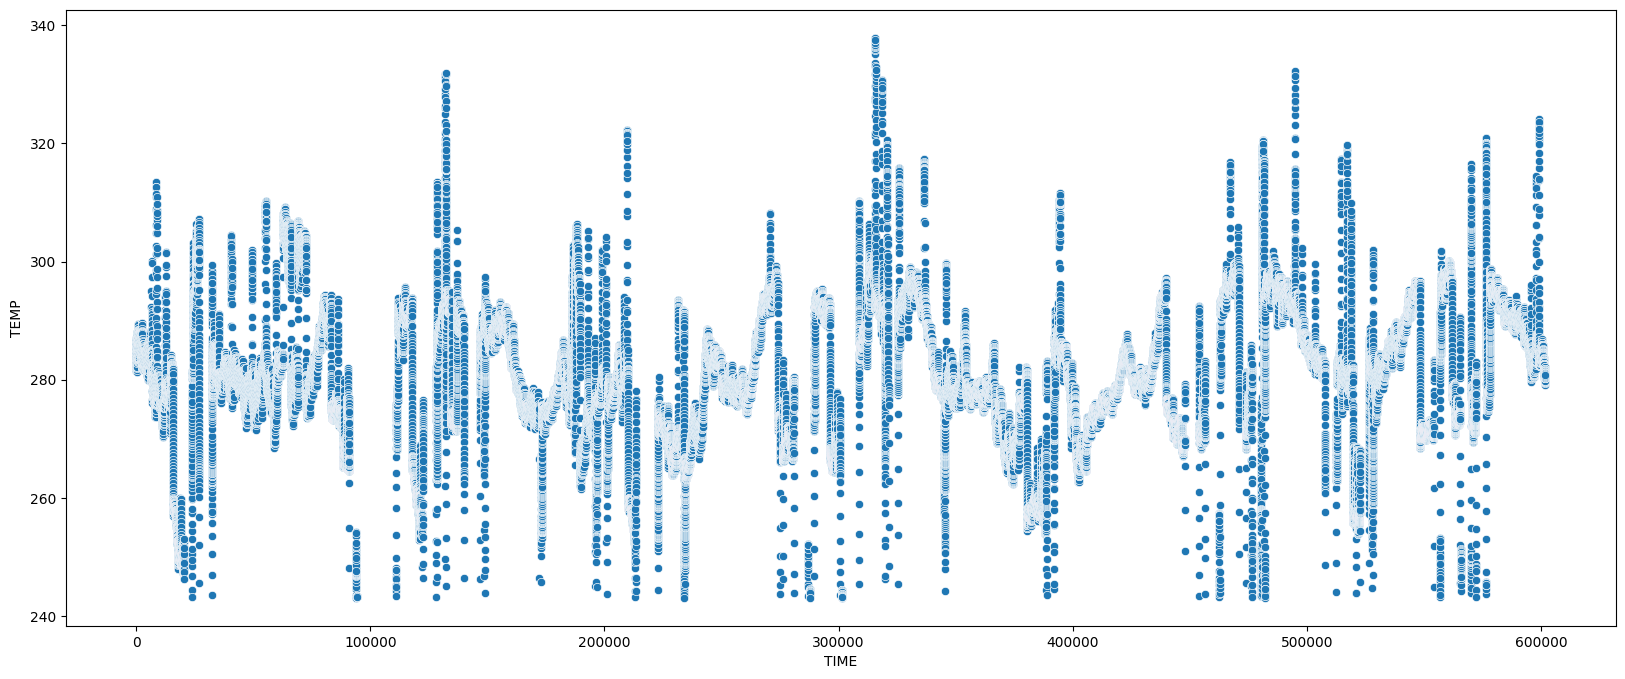

In [10]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = 'TIME', y = 'TEMP', data = B)
plt.show()

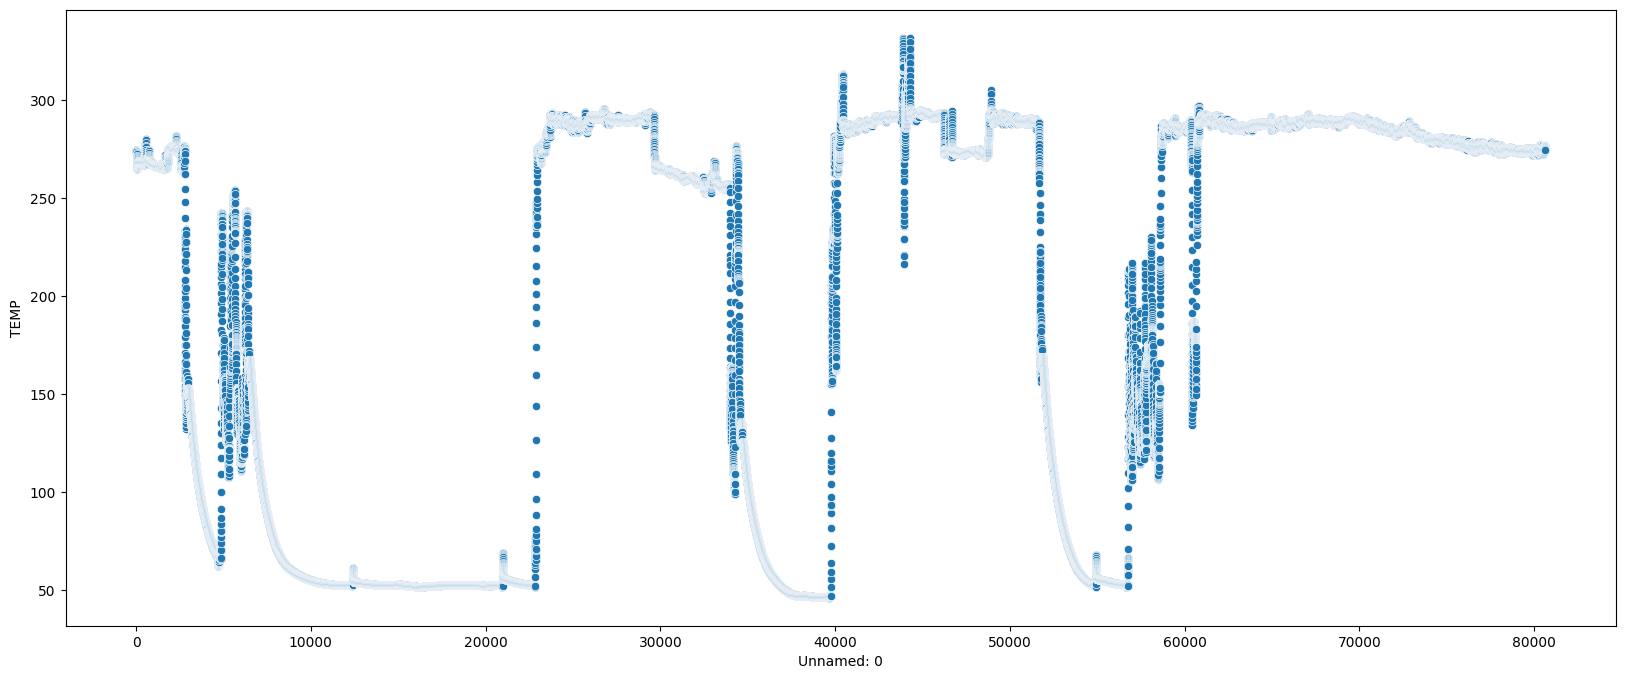

In [5]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = 'Unnamed: 0', y = 'TEMP', data = df)
plt.show()

In [ ]:
idx = 1
path_temp_gps = './temp_add_gps/'
list_temp_gps = os.listdir(path_temp_gps)
df = pd.read_csv(os.path.join(path_temp_gps + list_temp_gps[idx]))
df

In [104]:
48960 + 40316

89276

In [105]:
gas = pd.concat([gps_file_1.iloc[:, 2:4], gps_file_2.iloc[:, 2:4]], axis = 0).reset_index().drop(columns = 'index')

df = pd.concat([temp_file, gps_file_1[:1080].loc[:, ['longitude','latitude']]], axis = 1)
df.to_csv('./temp_add_gps/temp_and_gps_8.csv')

In [106]:
path_temp_gps = './temp_add_gps/'
list_temp_gps = os.listdir(path_temp_gps)
df = pd.read_csv(os.path.join(path_temp_gps + list_temp_gps[0]))
df

,Unnamed: 0,date,kst,TEMP,longitude,latitude
0,0,20230101,9:00,286.797,163.427467,28.531400
1,1,20230101,9:00,287.082,163.424783,28.531967
2,2,20230101,9:01,285.938,163.421917,28.532567
3,3,20230101,9:01,285.772,163.419217,28.532933
4,4,20230101,9:02,286.357,163.416517,28.533467
...,...,...,...,...,...,...
88189,88189,20230131,23:57,274.692,-81.480883,6.903217
88190,88190,20230131,23:58,274.674,-81.478700,6.903250
88191,88191,20230131,23:58,274.588,-81.476450,6.903300
88192,88192,20230131,23:59,274.511,-81.474217,6.903317


In [107]:
tmp = np.arange(88194)
TIME = pd.DataFrame({'TIME' : tmp})
df.drop(columns = 'Unnamed: 0', inplace = True)
df = pd.concat([df_1, TIME], axis = 1)
df

,date,kst,TEMP,longitude,latitude,TIME
0,20230101,9:00,286.797,163.427467,28.531400,0
1,20230101,9:00,287.082,163.424783,28.531967,1
2,20230101,9:01,285.938,163.421917,28.532567,2
3,20230101,9:01,285.772,163.419217,28.532933,3
4,20230101,9:02,286.357,163.416517,28.533467,4
...,...,...,...,...,...,...
88189,20230131,23:57,274.692,-81.480883,6.903217,88189
88190,20230131,23:58,274.674,-81.478700,6.903250,88190
88191,20230131,23:58,274.588,-81.476450,6.903300,88191
88192,20230131,23:59,274.511,-81.474217,6.903317,88192


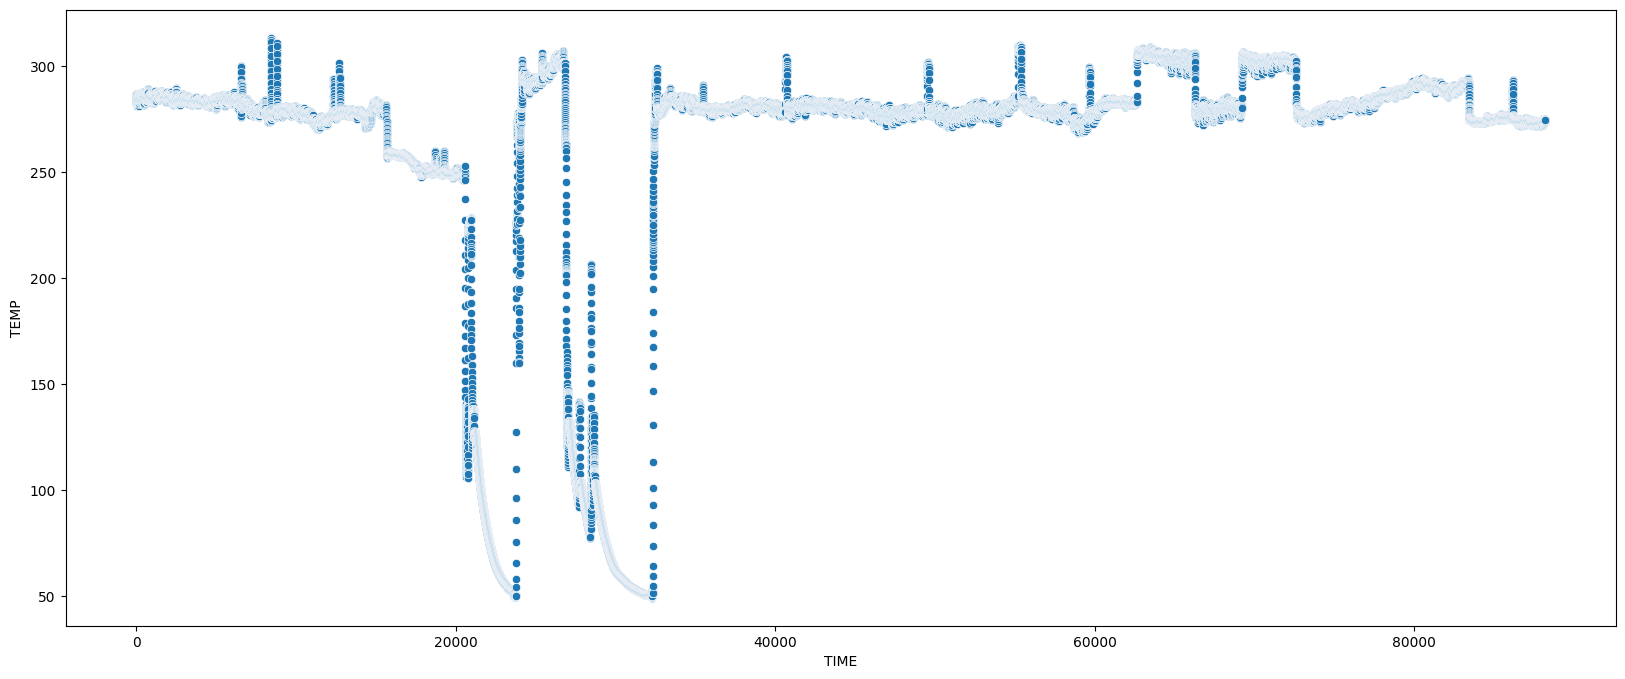

In [108]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = 'TIME', y = 'TEMP', data = df)
plt.show()

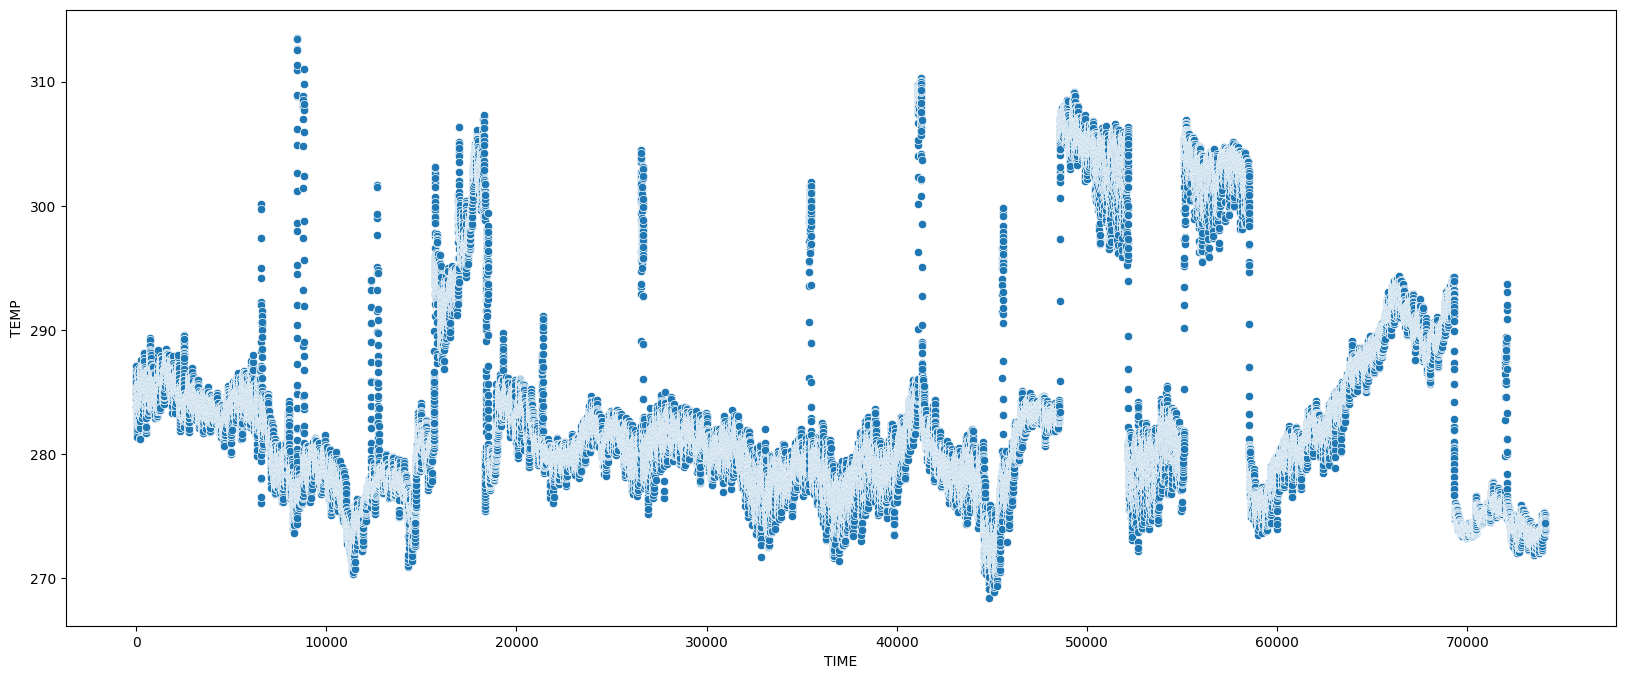

In [109]:
new_df = pd.read_csv('./new_temp_file/new_temp_df_1')
plt.figure(figsize=(20,8))
sns.scatterplot(x = 'TIME', y = 'TEMP', data = new_df)
plt.show()

In [110]:
pd.set_option('display.max_rows', 50)

In [111]:
tmp_df = df.drop(df.index[20009:23787], axis = 0).reset_index()
tmp_df

,index,date,kst,TEMP,longitude,latitude,TIME
0,0,20230101,9:00,286.797,163.427467,28.531400,0
1,1,20230101,9:00,287.082,163.424783,28.531967,1
2,2,20230101,9:01,285.938,163.421917,28.532567,2
3,3,20230101,9:01,285.772,163.419217,28.532933,3
4,4,20230101,9:02,286.357,163.416517,28.533467,4
...,...,...,...,...,...,...,...
84411,88189,20230131,23:57,274.692,-81.480883,6.903217,88189
84412,88190,20230131,23:58,274.674,-81.478700,6.903250,88190
84413,88191,20230131,23:58,274.588,-81.476450,6.903300,88191
84414,88192,20230131,23:59,274.511,-81.474217,6.903317,88192


<Figure size 640x480 with 0 Axes>

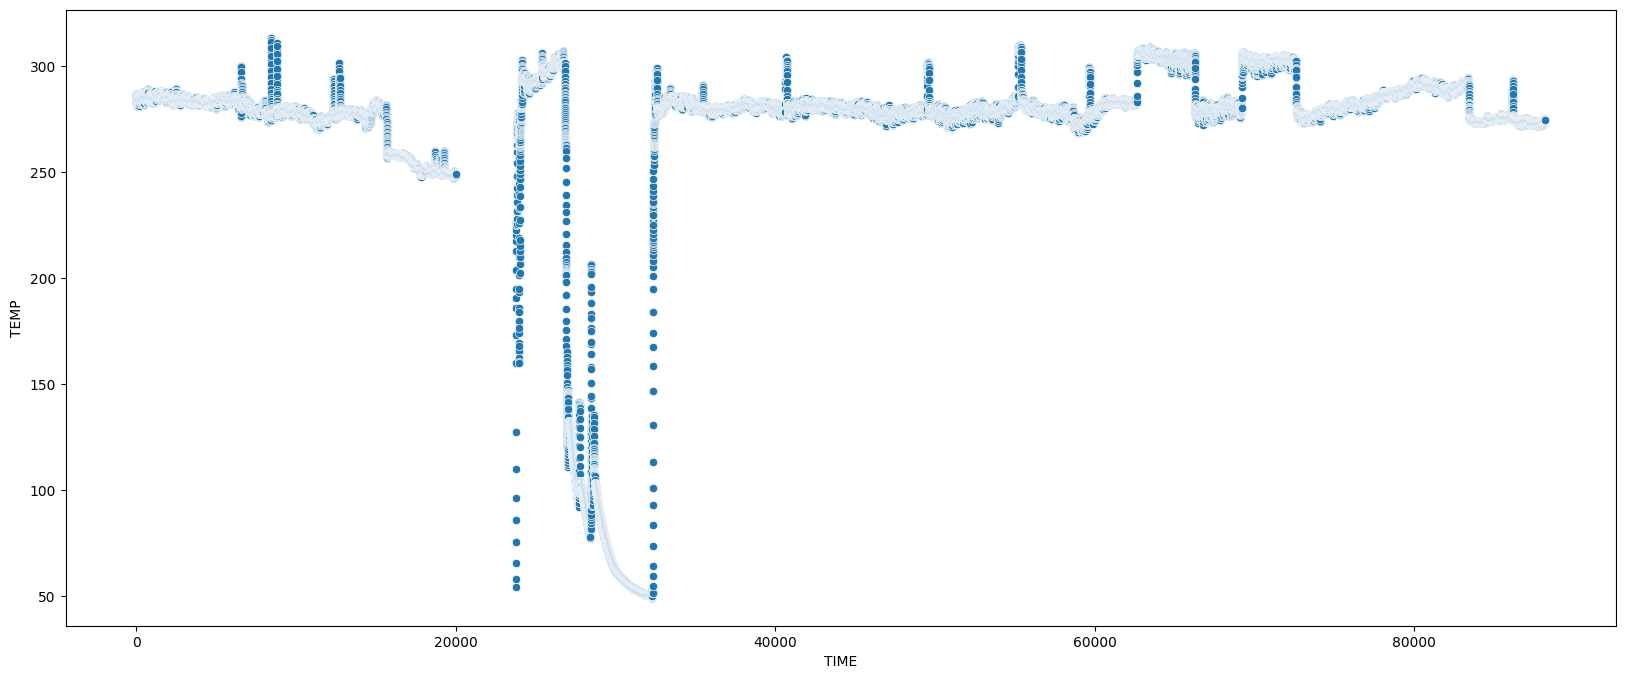

<Figure size 640x480 with 0 Axes>

In [112]:
plt.figure(figsize = (20,8))
sns.scatterplot(x = "TIME", y = 'TEMP', data = tmp_df)
plt.figure()

In [113]:
path_temp_gps = './temp_add_gps/'
list_temp_gps = os.listdir(path_temp_gps)
df = pd.read_csv(os.path.join(path_temp_gps + list_temp_gps[1]))
df

,Unnamed: 0,date,kst,TEMP,longitude,latitude
0,0,20230201,0:00,274.442,-81.469583,6.903383
1,1,20230201,0:00,274.484,-81.467367,6.903400
2,2,20230201,0:01,274.564,-81.465117,6.903433
3,3,20230201,0:01,274.634,-81.462883,6.903483
4,4,20230201,0:02,274.602,-81.460650,6.903517
...,...,...,...,...,...,...
80635,80635,20230228,23:57,274.941,-133.906433,27.399617
80636,80636,20230228,23:58,275.063,-133.908983,27.400183
80637,80637,20230228,23:58,275.255,-133.911533,27.400733
80638,80638,20230228,23:59,275.066,-133.914100,27.401300


In [114]:
temp_path = './new_temp_file/'
temp_list = os.listdir(temp_path)
df = pd.read_csv(os.path.join(temp_path+temp_list[0]))
for idx in range(1,8):
    tmp = pd.read_csv(os.path.join(temp_path+temp_list[idx]))
    df = pd.concat([df, tmp], axis = 0)

In [ ]:
df = df.drop(columns=['Unnamed: 0','TIME'], axis = 0)
tmp = np.arange(587696)
TIME = pd.DataFrame({'TIME' : tmp})

In [ ]:
df = df.reset_index()
df = df.drop(columns=['index','date','kst','longitude','latitude'])
df = df.drop(columns='level_0')
df

In [123]:
df = df.drop(columns=['level_0','index'])
df

,TEMP
0,286.797
1,287.082
2,285.938
3,285.772
4,286.357
...,...
587691,280.894
587692,280.625
587693,280.475
587694,280.545


In [124]:
tmp = np.arange(587696)
TIME = pd.DataFrame({'TIME' : tmp})
#df = df.drop(columns=['date','kst','longitude','latitude'], axis = 0)
df = pd.concat([df, TIME], axis = 1)
df

,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
587691,280.894,587691
587692,280.625,587692
587693,280.475,587693
587694,280.545,587694


In [126]:
df.to_csv('./new_temp_file/temperature_time')

In [128]:
A = pd.read_csv('./new_temp_file/temperature_time')
A

,Unnamed: 0,TEMP,TIME
0,0,286.797,0
1,1,287.082,1
2,2,285.938,2
3,3,285.772,3
4,4,286.357,4
...,...,...,...
587691,587691,280.894,587691
587692,587692,280.625,587692
587693,587693,280.475,587693
587694,587694,280.545,587694


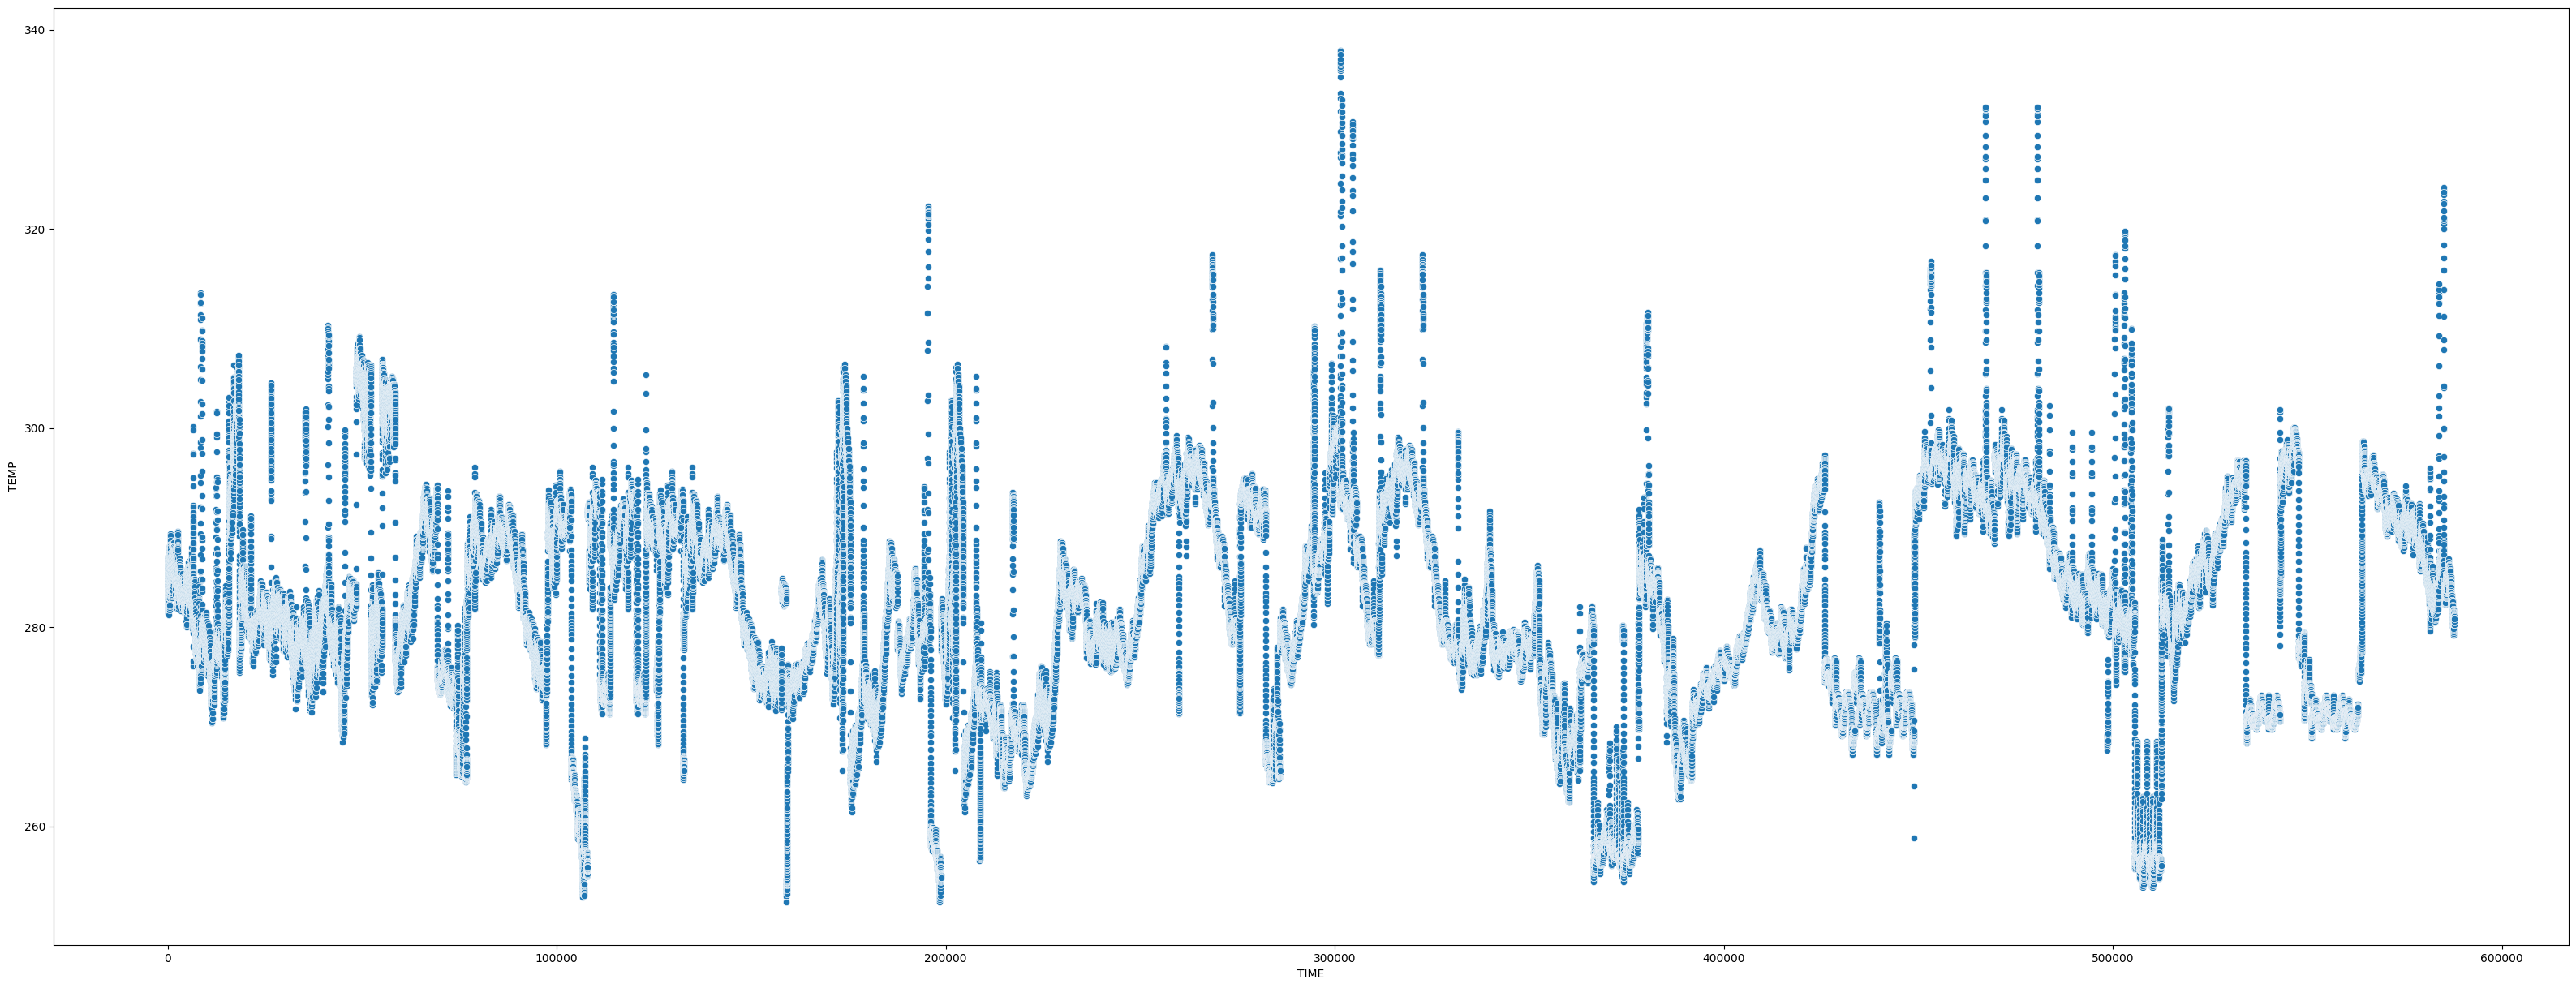

In [ ]:
plt.figure(figsize=(40,15))
sns.scatterplot(x = 'TIME', y ='TEMP', data = df)
plt.show()

In [ ]:
587696 // 8

73462

In [ ]:
def trend(time, slope = 0):
    return time * slope

In [ ]:
for i in range(1,8):
    globals()['df_'+str(i)+'_temp'] = df[73462*(i-1):73462*i].reset_index().drop(columns=['index'], axis=0)

In [ ]:
for i in range(1,8):
    mean = globals()['df_'+str(i)+'_temp']['TEMP'].mean()
    diff  = 283.733148 - mean
    globals()['df_'+str(i)+'_temp']['TEMP'] += diff

In [ ]:
for i in range(8,12):
    globals()['df_'+str(i)+'_temp'] = globals()['df_'+str(i-5)+'_temp'].copy()

In [ ]:

N = 6
dx = (600 - df_1_temp['TEMP'].mean()) / N # 전체 데이터에 대한 증가율 : 56.3785
dx_minute = dx / (len(df_1_temp)-1) # 분당 증가율

time = np.arange(73462)
slope = dx_minute * 2

for i in range(2,12):
    series = np.round(trend(time, slope = slope) + globals()['df_'+str(i)+'_temp']['TEMP'] + dx*(i-2), 3)
    globals()['df_'+str(i)+'_temp']['TEMP'] = series

In [ ]:
df_1_temp

,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
73457,274.041,73457
73458,273.977,73458
73459,273.932,73459
73460,273.942,73460


In [ ]:
df_temp_all = pd.concat([df_1_temp, df_2_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_3_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_4_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_5_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_6_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_7_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_8_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_9_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_10_temp], axis = 0)
df_temp_all = pd.concat([df_temp_all, df_11_temp], axis = 0)
df_temp_all = df_temp_all.reset_index().drop(columns=['index','TIME'])
tmp = np.arange(808082)
TIME = pd.DataFrame({'TIME' : tmp})
df_temp_all = pd.concat([df_temp_all, TIME], axis = 1)
df_temp_all

,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
808077,858.986,808077
808078,858.998,808078
808079,858.853,808079
808080,858.717,808080


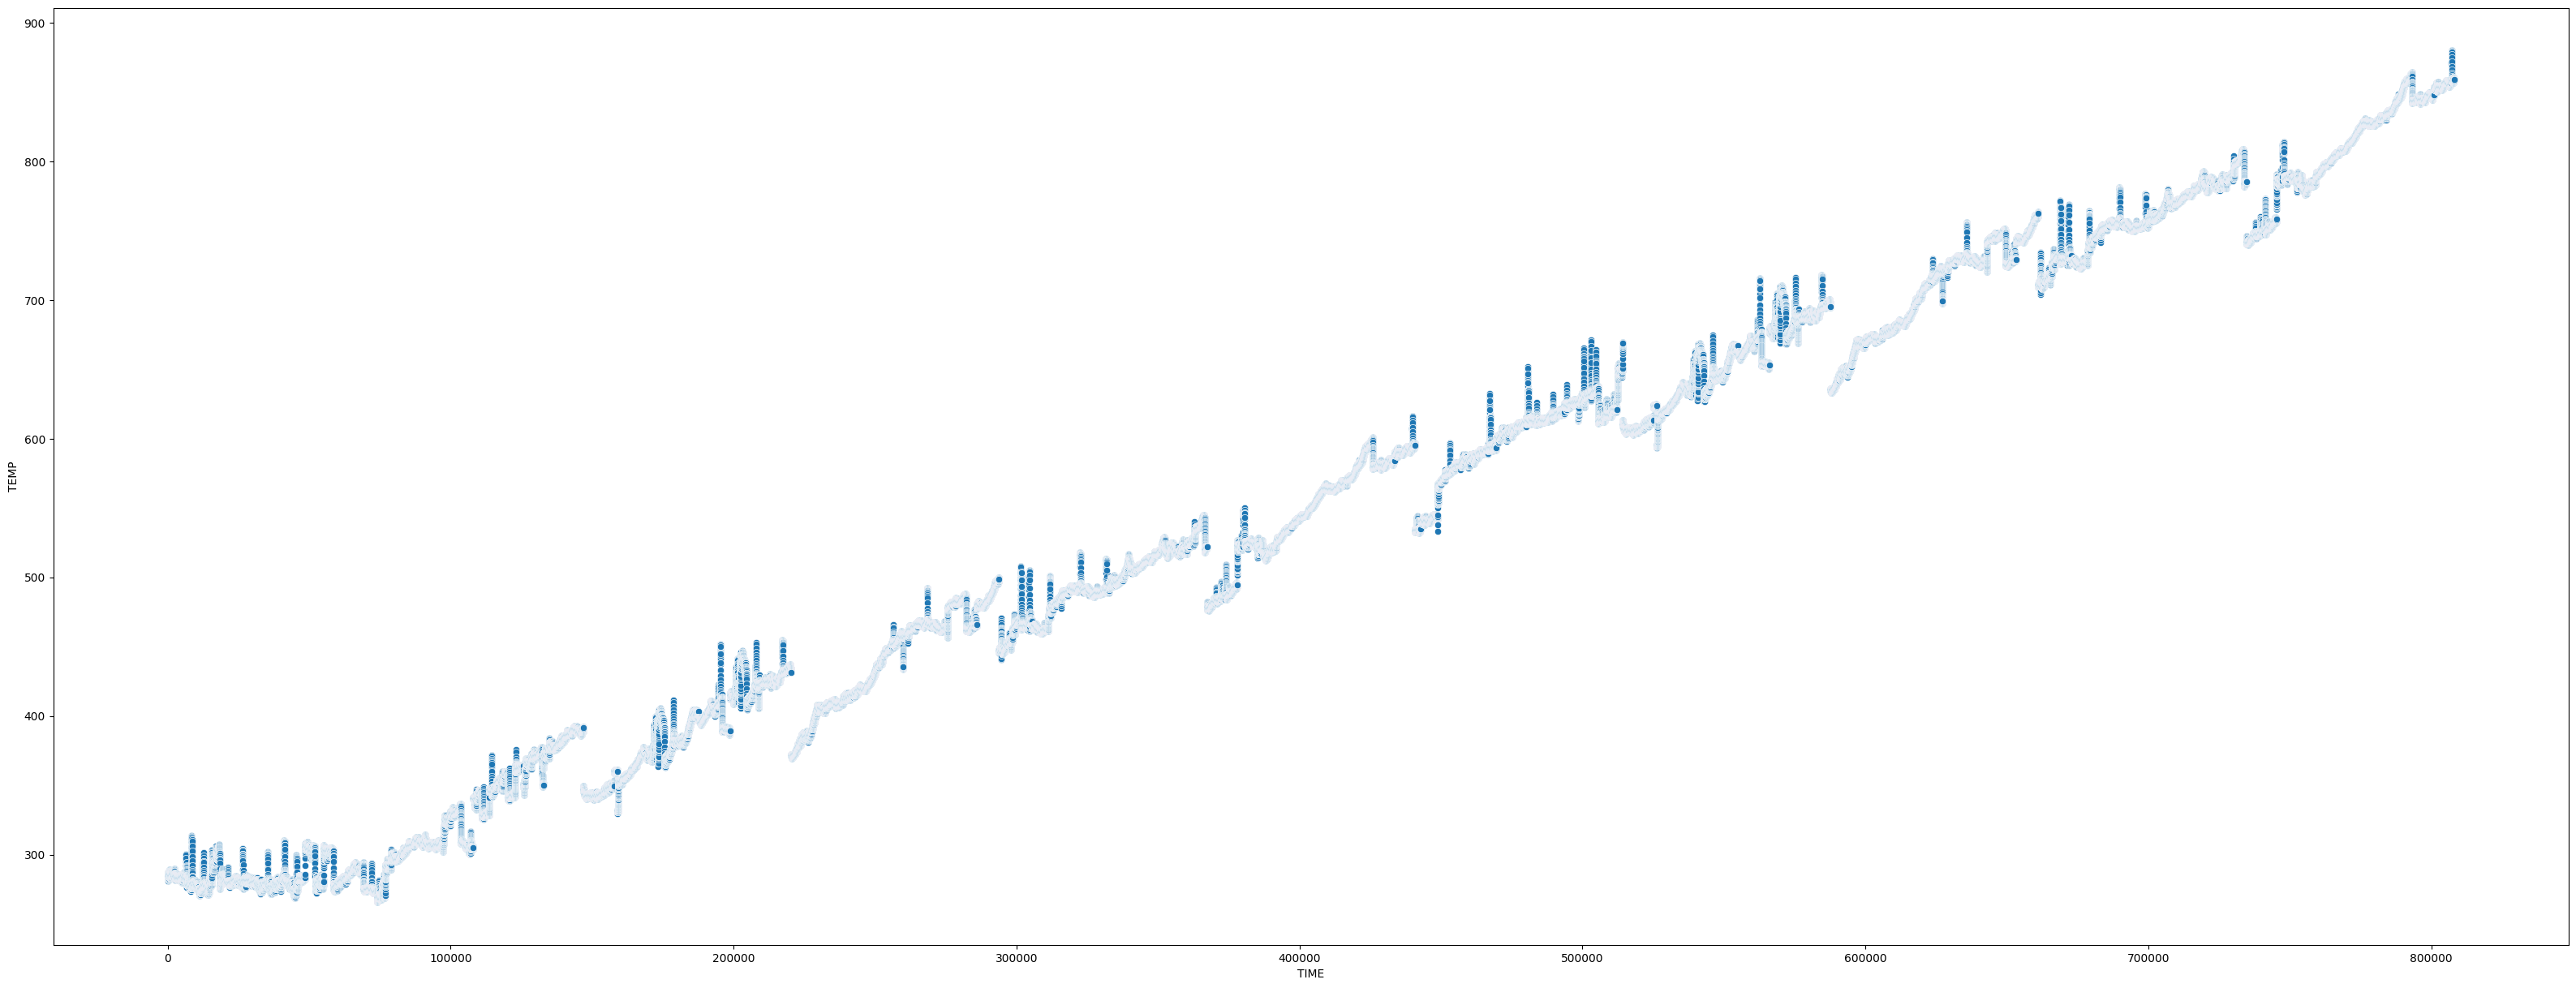

In [ ]:
plt.figure(figsize=(50,20))
sns.scatterplot(x = 'TIME', y = 'MEAN_TEMP', hue='Group', data = df, palette = 'Set2')
plt.show()

In [ ]:
for i in range(1,12):
    data = {'MEAN_TEMP' : [], 'STD' : [], 'MIN' : [], 'MAX' : [], 'SKEW' : [], 'KURT' : [], 'MEDIAN':[], '25%' : [], '75%' : [], 'Group' : []}

    for j in range(0,73462,10):
        temp = globals()['df_'+str(i)+'_temp']['TEMP'][j:j+20]
        MEAN = np.round(np.mean(temp), 3)
        MIN = np.min(temp)
        MAX = np.max(temp)
        STD = np.std(temp)
        median = temp.median()
        skew = temp.skew()
        kurt = temp.kurt()
        a, b = np.percentile(temp, q = [25,75])

        data['Group'].append(i)
        data['MEAN_TEMP'].append(MEAN)
        data['MIN'].append(MIN)
        data['MAX'].append(MAX)
        data['STD'].append(STD)
        data['SKEW'].append(skew)
        data['KURT'].append(kurt)
        data['MEDIAN'].append(np.round(median,3))
        data['25%'].append(np.round(a,3))
        data['75%'].append(np.round(b,3))

    globals()['group_'+str(i)] = pd.DataFrame(data)


print(len(group_1))
TIME = pd.DataFrame({'TIME' : np.arange(40414)})
tmp = pd.concat([group_1, group_2], axis = 0)
tmp = pd.concat([tmp, group_3], axis = 0)
tmp = pd.concat([tmp, group_4], axis = 0)
tmp = pd.concat([tmp, group_5], axis = 0)
tmp = pd.concat([tmp, group_6], axis = 0)
tmp = pd.concat([tmp, group_7], axis = 0)
tmp = pd.concat([tmp, group_8], axis = 0)
tmp = pd.concat([tmp, group_9], axis = 0)
tmp = pd.concat([tmp, group_10], axis = 0)
tmp = pd.concat([tmp, group_11], axis = 0)
tmp = tmp.reset_index()
tmp = pd.concat([tmp, TIME], axis = 1)
tmp.drop(columns = ['index'], inplace = True)
df = tmp
df


7347


,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,Group,TIME
0,285.886,0.703473,284.483,287.082,-0.295420,-0.875405,285.893,285.274,286.394,1,0.0
1,284.200,1.858006,281.401,286.690,-0.067890,-1.659449,284.126,282.486,285.963,1,1.0
2,282.799,0.721184,281.401,284.014,-0.285944,-0.801952,282.885,282.242,283.295,1,2.0
3,283.295,0.440360,282.306,284.014,-0.567776,-0.220987,283.327,283.082,283.642,1,3.0
4,283.836,0.709563,283.085,285.439,1.343684,0.750411,283.647,283.312,283.884,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
80812,859.064,0.434339,858.337,859.755,-0.409836,-1.079603,859.194,858.643,859.396,11,NaN
80813,858.936,0.407331,858.337,859.522,-0.032319,-1.664372,858.917,858.602,859.322,11,NaN
80814,859.058,0.262727,858.522,859.522,0.008027,-0.418698,858.999,858.941,859.286,11,NaN
80815,858.956,0.110925,858.717,859.141,-0.658286,0.438145,858.988,858.894,859.013,11,NaN


In [ ]:
df = df.dropna(axis = 0).reset_index().drop(columns=['index'])
df

,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,Group,TIME
0,285.886,0.703473,284.483,287.082,-0.295420,-0.875405,285.893,285.274,286.394,1,0.0
1,284.200,1.858006,281.401,286.690,-0.067890,-1.659449,284.126,282.486,285.963,1,1.0
2,282.799,0.721184,281.401,284.014,-0.285944,-0.801952,282.885,282.242,283.295,1,2.0
3,283.295,0.440360,282.306,284.014,-0.567776,-0.220987,283.327,283.082,283.642,1,3.0
4,283.836,0.709563,283.085,285.439,1.343684,0.750411,283.647,283.312,283.884,1,4.0
...,...,...,...,...,...,...,...,...,...,...,...
40404,550.596,0.202745,550.305,551.132,1.194125,1.645520,550.600,550.458,550.645,6,40409.0
40405,550.580,0.156307,550.305,550.906,0.256079,-0.432826,550.579,550.471,550.661,6,40410.0
40406,550.607,0.171573,550.274,550.906,-0.087802,-0.567637,550.607,550.492,550.718,6,40411.0
40407,550.804,0.364898,550.274,551.564,0.596357,-0.388148,550.694,550.521,551.082,6,40412.0


In [ ]:
def THRESHOLD(data):
    if data>=784.4889:
        return 11
    elif data>=731.7778:
        return 10
    elif data>=679.0667:
        return 9
    elif data>=626.3555:
        return 8
    elif data>=573.6444:
        return 7
    elif data>=520.9332:
        return 6
    elif data>=468.2221:
        return 5
    elif data>=415.5110:
        return 4
    elif data>=362.7998:
        return 3
    elif data>=310.0887:
        return 2
    else:
        return 1

In [ ]:
df

,MEAN_TEMP,STD,MIN,MAX,SKEW,KURT,MEDIAN,25%,75%,Group,TIME
0,284.754,1.757615,281.401,287.082,-0.611428,-1.042047,285.230,283.245,286.301,1,0
1,283.368,1.222465,281.401,286.373,0.957421,0.920964,283.221,282.639,283.761,1,1
2,283.593,0.734860,282.306,285.439,1.045169,1.285482,283.430,283.214,283.800,1,2
3,283.820,0.687306,282.952,285.439,1.110405,0.404756,283.617,283.356,284.071,1,3
4,283.909,0.854193,282.463,286.186,0.803411,0.522090,283.770,283.443,284.276,1,4
...,...,...,...,...,...,...,...,...,...,...,...
53873,859.508,0.128948,859.257,859.769,0.251335,0.171144,859.492,859.462,859.564,11,53873
53874,859.239,0.436917,858.337,859.769,-0.900696,-0.361768,859.399,859.078,859.525,11,53874
53875,859.010,0.360564,858.337,859.522,-0.456201,-1.028915,859.054,858.681,859.309,11,53875
53876,859.031,0.264452,858.522,859.522,0.189010,-0.576731,858.994,858.866,859.242,11,53876


In [ ]:
X = df['MEAN_TEMP'].values
Y = df['Group'].values

predict = list(map(THRESHOLD, X))
print(accuracy_score(predict, Y))

0.6011557117402495


In [ ]:
X = df.iloc[:, :9].values
y = df['Group'].values 


In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 96)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

lgbm = LGBMClassifier(n_estimators = 100)

lgbm.fit(X_train, y_train,
         eval_metric = 'multi_logloss',
         eval_set = [(X_test, y_test)])
lgbm_predict = lgbm.predict(X_test)
print("LGBM ", accuracy_score(y_test, lgbm_predict))

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
print("KN", accuracy_score(y_test, knn_pred))

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state = 42)

dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
print("DTC", accuracy_score(y_test, dtc_pred))

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth = 50, random_state = 96)
clf.fit(X_train, y_train)

clf_predict = clf.predict(X_test)
print("RFC", accuracy_score(clf_predict, y_test))

(32327, 9) (8082, 9) (32327,) (8082,)
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000402 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 32327, number of used features: 9
[LightGBM] [Info] Start training from score -1.701968
[LightGBM] [Info] Start training from score -1.703156
[LightGBM] [Info] Start training from score -1.705027
[LightGBM] [Info] Start training from score -1.703666
[LightGBM] [Info] Start training from score -1.702647
[LightGBM] [Info] Start training from score -2.412572
LGBM  0.8104429596634496
KN 0.7927493194753774
DTC 0.7671368473150211
RFC 0.8202177678792378


In [ ]:
df_temp_all

,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
808077,858.986,808077
808078,858.998,808078
808079,858.853,808079
808080,858.717,808080


In [ ]:
import torch
torch.cuda.is_available()

True

## LSTM

In [ ]:
df_temp_all

,TEMP,TIME
0,286.797,0
1,287.082,1
2,285.938,2
3,285.772,3
4,286.357,4
...,...,...
808077,858.986,808077
808078,858.998,808078
808079,858.853,808079
808080,858.717,808080


In [ ]:
train_len = int(len(df_temp_all) * 0.8)
X_train = df_temp_all['TEMP'][:train_len].values
X_test = df_temp_all['TEMP'][train_len:].values

In [ ]:
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

## Transformer

| epoch   1 |   252/ 1262 batches | lr 0.005000 | 22.70 ms | loss 1.09179 | ppl     2.98
| epoch   1 |   504/ 1262 batches | lr 0.005000 | 15.10 ms | loss 0.00089 | ppl     1.00
| epoch   1 |   756/ 1262 batches | lr 0.005000 | 14.16 ms | loss 0.00058 | ppl     1.00
| epoch   1 |  1008/ 1262 batches | lr 0.005000 | 14.10 ms | loss 0.00047 | ppl     1.00
| epoch   1 |  1260/ 1262 batches | lr 0.005000 | 14.17 ms | loss 0.00096 | ppl     1.00
-----------------------------------------------------------------------------------------
| end of epoch   1 | time: 22.15s | valid loss 0.00515 | valid ppl     1.01
-----------------------------------------------------------------------------------------
| epoch   2 |   252/ 1262 batches | lr 0.004513 | 14.17 ms | loss 0.00814 | ppl     1.01
| epoch   2 |   504/ 1262 batches | lr 0.004513 | 14.16 ms | loss 0.00057 | ppl     1.00
| epoch   2 |   756/ 1262 batches | lr 0.004513 | 15.05 ms | loss 0.00053 | ppl     1.00
| epoch   2 |  1008/ 1262 batche

FileNotFoundError: [Errno 2] No such file or directory: 'graph/transformer-epoch5.png'

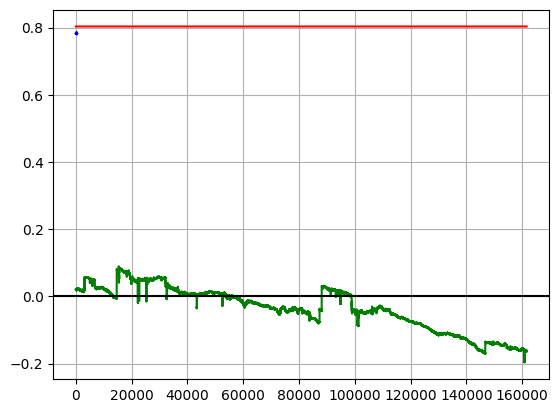

In [ ]:
# import torch
# import torch.nn as nn
# import numpy as np
# import time
# import math
# from matplotlib import pyplot

# torch.manual_seed(0)
# np.random.seed(0)

# # S is the source sequence length
# # T is the target sequence length
# # N is the batch size
# # E is the feature number

# #src = torch.rand((10, 32, 512)) # (S,N,E) 
# #tgt = torch.rand((20, 32, 512)) # (T,N,E)
# #out = transformer_model(src, tgt)

# input_window = 20 # number of input steps
# output_window = 1 # number of prediction steps, in this model its fixed to one
# block_len = input_window + output_window # for one input-output pair
# batch_size = 512
# train_size = 0.8
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# class PositionalEncoding(nn.Module):

#     def __init__(self, d_model, max_len=5000):
#         super(PositionalEncoding, self).__init__()       
#         pe = torch.zeros(max_len, d_model)
#         position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
#         # div_term = torch.exp(
#         #     torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model)
#         # )
#         div_term = 1 / (10000 ** ((2 * np.arange(d_model)) / d_model))
#         pe[:, 0::2] = torch.sin(position * div_term[0::2])
#         pe[:, 1::2] = torch.cos(position * div_term[1::2])

#         pe = pe.unsqueeze(0).transpose(0, 1) # [5000, 1, d_model],so need seq-len <= 5000
#         #pe.requires_grad = False
#         self.register_buffer('pe', pe)

#     def forward(self, x):
#         # print(self.pe[:x.size(0), :].repeat(1,x.shape[1],1).shape ,'---',x.shape)
#         # dimension 1 maybe inequal batchsize
#         return x + self.pe[:x.size(0), :].repeat(1,x.shape[1],1)
          

# class TransAm(nn.Module):
#     def __init__(self,feature_size=250,num_layers=1,dropout=0.1):
#         super(TransAm, self).__init__()
#         self.model_type = 'Transformer'
#         self.input_embedding  = nn.Linear(1,feature_size)
#         self.src_mask = None

#         self.pos_encoder = PositionalEncoding(feature_size)
#         self.encoder_layer = nn.TransformerEncoderLayer(d_model=feature_size, nhead=10, dropout=dropout)
#         self.transformer_encoder = nn.TransformerEncoder(self.encoder_layer, num_layers=num_layers)
#         self.decoder = nn.Linear(feature_size,1)
#         self.init_weights()

#     def init_weights(self):
#         initrange = 0.1    
#         self.decoder.bias.data.zero_()
#         self.decoder.weight.data.uniform_(-initrange, initrange)

#     def forward(self,src):
#         # src with shape (input_window, batch_len, 1)
#         if self.src_mask is None or self.src_mask.size(0) != len(src):
#             device = src.device
#             mask = self._generate_square_subsequent_mask(len(src)).to(device)
#             self.src_mask = mask

#         src = self.input_embedding(src) # linear transformation before positional embedding
#         src = self.pos_encoder(src)
#         output = self.transformer_encoder(src,self.src_mask)#, self.src_mask)
#         output = self.decoder(output)
#         return output

#     def _generate_square_subsequent_mask(self, sz):
#         mask = (torch.triu(torch.ones(sz, sz)) == 1).transpose(0, 1)
#         mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
#         return mask

# # if window is 100 and prediction step is 1
# # in -> [0..99]
# # target -> [1..100]
# '''
# In fact, assuming that the number of samples is N, 
# the length of the input sequence is m, and the backward prediction is k steps, 
# then length of a block [input : 1 , 2 ... m  -> output : k , k+1....m+k ] 
# should be (m+k) :  block_len, so to ensure that each block is complete, 
# the end element of the last block should be the end element of the entire sequence, 
# so the actual number of blocks is [N - block_len + 1] 
# '''
# def create_inout_sequences(input_data, input_window ,output_window):
#     inout_seq = []
#     L = len(input_data)
#     block_num =  L - block_len + 1
#     # total of [N - block_len + 1] blocks
#     # where block_len = input_window + output_window

#     for i in range( block_num ):
#         train_seq = input_data[i : i + input_window]
#         train_label = input_data[i + output_window : i + input_window + output_window]
#         inout_seq.append((train_seq ,train_label))

#     return torch.FloatTensor(np.array(inout_seq))

# def get_data():
#     # construct a littel toy dataset
#     time        = df_temp_all['TIME'].values
#     amplitude   = df_temp_all['TEMP'].values

#     from sklearn.preprocessing import MinMaxScaler
    
#     #loading weather data from a file
#     #from pandas import read_csv
#     #series = read_csv('daily-min-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
    
#     # looks like normalizing input values curtial for the model
#     scaler = MinMaxScaler() 
#     #amplitude = scaler.fit_transform(series.to_numpy().reshape(-1, 1)).reshape(-1)
#     amplitude = scaler.fit_transform(amplitude.reshape(-1, 1)).reshape(-1)

#     sampels = int(len(time) * train_size) # use a parameter to control training size
#     train_data = amplitude[:sampels]
#     test_data = amplitude[sampels:]

#     # convert our train data into a pytorch train tensor
#     #train_tensor = torch.FloatTensor(train_data).view(-1)

#     train_sequence = create_inout_sequences( train_data,input_window ,output_window)
#     '''
#     train_sequence = train_sequence[:-output_window] # todo: fix hack? -> din't think this through, looks like the last n sequences are to short, so I just remove them. Hackety Hack..
#     # looks like maybe solved
#     '''
#     #test_data = torch.FloatTensor(test_data).view(-1) 
#     test_data = create_inout_sequences(test_data,input_window,output_window)
#     '''
#     test_data = test_data[:-output_window] # todo: fix hack?
#     '''
#     # shape with (block , sql_len , 2 )
#     return train_sequence.to(device),test_data.to(device)


# def get_batch(input_data, i , batch_size):

#     # batch_len = min(batch_size, len(input_data) - 1 - i) #  # Now len-1 is not necessary
#     batch_len = min(batch_size, len(input_data) - i)
#     data = input_data[ i:i + batch_len ]
#     input = torch.stack([item[0] for item in data]).view((input_window,batch_len,1))
#     # ( seq_len, batch, 1 ) , 1 is feature size
#     target = torch.stack([item[1] for item in data]).view((input_window,batch_len,1))
#     return input, target

# def train(train_data):
#     model.train() # Turn on the train mode \o/
#     total_loss = 0.
#     start_time = time.time()

#     for batch, i in enumerate(range(0, len(train_data), batch_size)):  # Now len-1 is not necessary
#         # data and target are the same shape with (input_window,batch_len,1)
#         data, targets = get_batch(train_data, i , batch_size)
#         optimizer.zero_grad()
#         output = model(data)
#         loss = criterion(output, targets)
#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(model.parameters(), 0.7)
#         optimizer.step()

#         total_loss += loss.item()
#         log_interval = int(len(train_data) / batch_size / 5)
#         if batch % log_interval == 0 and batch > 0:
#             cur_loss = total_loss / log_interval
#             elapsed = time.time() - start_time
#             print('| epoch {:3d} | {:5d}/{:5d} batches | '
#                   'lr {:02.6f} | {:5.2f} ms | '
#                   'loss {:5.5f} | ppl {:8.2f}'.format(
#                     epoch, batch, len(train_data) // batch_size, scheduler.get_lr()[0],
#                     elapsed * 1000 / log_interval,
#                     cur_loss, math.exp(cur_loss)))
#             total_loss = 0
#             start_time = time.time()

# def plot_and_loss(eval_model, data_source,epoch):
#     eval_model.eval() 
#     total_loss = 0.
#     test_result = torch.Tensor(0)    
#     truth = torch.Tensor(0)
#     with torch.no_grad():
#         # for i in range(0, len(data_source) - 1):
#         for i in range(len(data_source)):  # Now len-1 is not necessary
#             data, target = get_batch(data_source, i , 1) # one-step forecast
#             output = eval_model(data)            
#             total_loss += criterion(output, target).item()
#             test_result = torch.cat((test_result, output[-1].view(-1).cpu()), 0)
#             truth = torch.cat((truth, target[-1].view(-1).cpu()), 0)
            
#     #test_result = test_result.cpu().numpy() -> no need to detach stuff.. 
#     len(test_result)

#     pyplot.plot(test_result,color="red")
#     pyplot.plot(truth[:500],color="blue")
#     pyplot.plot(test_result-truth,color="green")
#     pyplot.grid(True, which='both')
#     pyplot.axhline(y=0, color='k')
#     pyplot.savefig('graph/transformer-epoch%d.png'%epoch)
#     pyplot.close()
#     return total_loss / i


# # predict the next n steps based on the input data 
# def predict_future(eval_model, data_source,steps):
#     eval_model.eval() 
#     total_loss = 0.
#     test_result = torch.Tensor(0)    
#     truth = torch.Tensor(0)
#     data, _ = get_batch(data_source , 0 , 1)
#     with torch.no_grad():
#         for i in range(0, steps):            
#             output = eval_model(data[-input_window:])
#             # (seq-len , batch-size , features-num)
#             # input : [ m,m+1,...,m+n ] -> [m+1,...,m+n+1]
#             data = torch.cat((data, output[-1:])) # [m,m+1,..., m+n+1]

#     data = data.cpu().view(-1)
    
#     # I used this plot to visualize if the model pics up any long therm structure within the data.
#     pyplot.plot(data,color="red")       
#     pyplot.plot(data[:input_window],color="blue")    
#     pyplot.grid(True, which='both')
#     pyplot.axhline(y=0, color='k')
#     pyplot.savefig('graph/transformer-future%d.png'%steps)
#     pyplot.show()
#     pyplot.close()
        

# def evaluate(eval_model, data_source):
#     eval_model.eval() # Turn on the evaluation mode
#     total_loss = 0.
#     eval_batch_size = 1000
#     with torch.no_grad():
#         # for i in range(0, len(data_source) - 1, eval_batch_size): # Now len-1 is not necessary
#         for i in range(0, len(data_source), eval_batch_size):
#             data, targets = get_batch(data_source, i,eval_batch_size)
#             output = eval_model(data)            
#             total_loss += len(data[0]) * criterion(output, targets).cpu().item()
#     return total_loss / len(data_source)

# train_data, val_data = get_data()
# model = TransAm().to(device)

# criterion = nn.MSELoss()
# lr = 0.005 
# #optimizer = torch.optim.SGD(model.parameters(), lr=lr)
# optimizer = torch.optim.AdamW(model.parameters(), lr=lr)
# scheduler = torch.optim.lr_scheduler.StepLR(optimizer, 1, gamma=0.95)

# best_val_loss = float("inf")
# epochs = 10 # The number of epochs
# best_model = None

# for epoch in range(1, epochs + 1):
#     epoch_start_time = time.time()
#     train(train_data)
#     if ( epoch % 5 == 0 ):
#         val_loss = plot_and_loss(model, val_data,epoch)
#         predict_future(model, val_data,200)
#     else:
#         val_loss = evaluate(model, val_data)
   
#     print('-' * 89)
#     print('| end of epoch {:3d} | time: {:5.2f}s | valid loss {:5.5f} | valid ppl {:8.2f}'.format(epoch, (time.time() - epoch_start_time),
#                                      val_loss, math.exp(val_loss)))
#     print('-' * 89)

#     #if val_loss < best_val_loss:
#     #    best_val_loss = val_loss
#     #    best_model = model

#     scheduler.step() 

# #src = torch.rand(input_window, batch_size, 1) # (source sequence length,batch size,feature number) 
# #out = model(src)
# #
# #print(out)
# #print(out.shape)

## TCN

## LSTM